# Integer Encoding


In [1]:
import numpy as np

In [ ]:
sentences = [
    "I go",
    "You run",
    "He sleeps",
    "I eat apples",
    "She likes pizza",
    "We play football",
    "They read many books",
    "I saw a big dog",
    "She bought some new shoes",
    "We watched a funny movie",
]

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(oov_token="<nothing>")

In [5]:
tokenizer.fit_on_texts(sentences)

In [6]:
tokenizer.word_index

{'<nothing>': 1,
 'i': 2,
 'she': 3,
 'we': 4,
 'a': 5,
 'go': 6,
 'you': 7,
 'run': 8,
 'he': 9,
 'sleeps': 10,
 'eat': 11,
 'apples': 12,
 'likes': 13,
 'pizza': 14,
 'play': 15,
 'football': 16,
 'they': 17,
 'read': 18,
 'many': 19,
 'books': 20,
 'saw': 21,
 'big': 22,
 'dog': 23,
 'bought': 24,
 'some': 25,
 'new': 26,
 'shoes': 27,
 'watched': 28,
 'funny': 29,
 'movie': 30}

In [7]:
tokenizer.word_counts

OrderedDict([('i', 3),
             ('go', 1),
             ('you', 1),
             ('run', 1),
             ('he', 1),
             ('sleeps', 1),
             ('eat', 1),
             ('apples', 1),
             ('she', 2),
             ('likes', 1),
             ('pizza', 1),
             ('we', 2),
             ('play', 1),
             ('football', 1),
             ('they', 1),
             ('read', 1),
             ('many', 1),
             ('books', 1),
             ('saw', 1),
             ('a', 2),
             ('big', 1),
             ('dog', 1),
             ('bought', 1),
             ('some', 1),
             ('new', 1),
             ('shoes', 1),
             ('watched', 1),
             ('funny', 1),
             ('movie', 1)])

In [8]:
tokenizer.document_count

10

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)

In [10]:
sequences

[[2, 6],
 [7, 8],
 [9, 10],
 [2, 11, 12],
 [3, 13, 14],
 [4, 15, 16],
 [17, 18, 19, 20],
 [2, 21, 5, 22, 23],
 [3, 24, 25, 26, 27],
 [4, 28, 5, 29, 30]]

In [11]:
sentences[4]

'She likes pizza'

In [12]:
sequences[4]

[3, 13, 14]

In [13]:
words_to_check = ["she", "likes", "pizza"]
indices = [tokenizer.word_index.get(word) for word in words_to_check]
print(indices)

[3, 13, 14]


# Imdb dataset


In [ ]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Flatten

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
X_train[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

- ### The reviews given are already integer encoded


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
len(X_train[0]), len(X_train[4]), len(X_train[5])

(218, 147, 43)

Apply padding due to varying reviews length


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, padding="post", maxlen=50)
X_test = pad_sequences(X_test, padding="post", maxlen=50)

# just 50 words used

In [ ]:
X_train.shape, X_test.shape

((25000, 50), (25000, 50))

In [ ]:
len(X_train[0]), len(X_train[5])

(50, 50)

In [ ]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(50, 1), return_sequences=False))
model.add(Dense(1, activation="sigmoid"))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

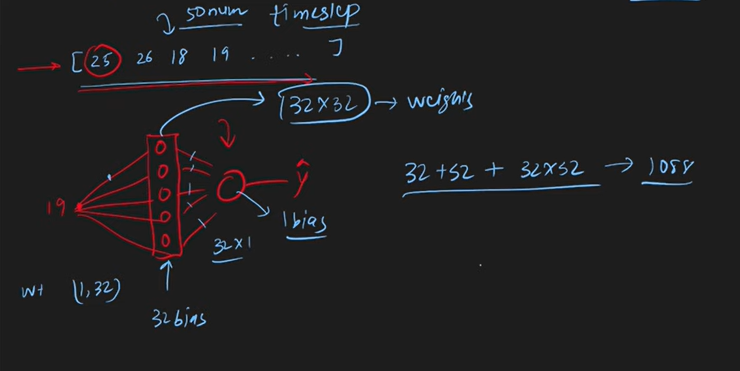


In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5046 - loss: 0.6943 - val_accuracy: 0.5058 - val_loss: 0.6940
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5094 - loss: 0.6930 - val_accuracy: 0.5027 - val_loss: 0.6953
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.5030 - val_loss: 0.6958
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5063 - loss: 0.6923 - val_accuracy: 0.5023 - val_loss: 0.6965
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5064 - loss: 0.6924 - val_accuracy: 0.5048 - val_loss: 0.6947
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5037 - loss: 0.6924 - val_accuracy: 0.5014 - val_loss: 0.6967
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5089 - loss: 0.6927 - val_accuracy: 0.5052 - val_loss: 0.6951
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5096 - loss: 0.6920 - val_accuracy